# Supplementary Information

This notebook contains the code to generate all plots for the supplementary information

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess

## Notebook contents

1. [Ionic latch](#1.-Ionic-latch)
2. [Example sMD results](#2.-Example-sMD-results)
3. [sMD CV target values](#3.-sMD-CV-target-values)
4. [Hinge and PBC Hbonds](#4.-Hinge-and-PBC-Hbonds)
5. [cAMP Hbonds with L273W](#5.-cAMP-Hbonds-with-L273W)
6. [I942 internal dihedrals](#6.-I942-internal-dihedrals)
7. [Restraints](#7.-Restraints)

## 1. Ionic latch

In [124]:
il_distances = pd.read_csv('../systems/apo/inactive/equilibrium/il.txt', delim_whitespace=True).iloc[:,1:]

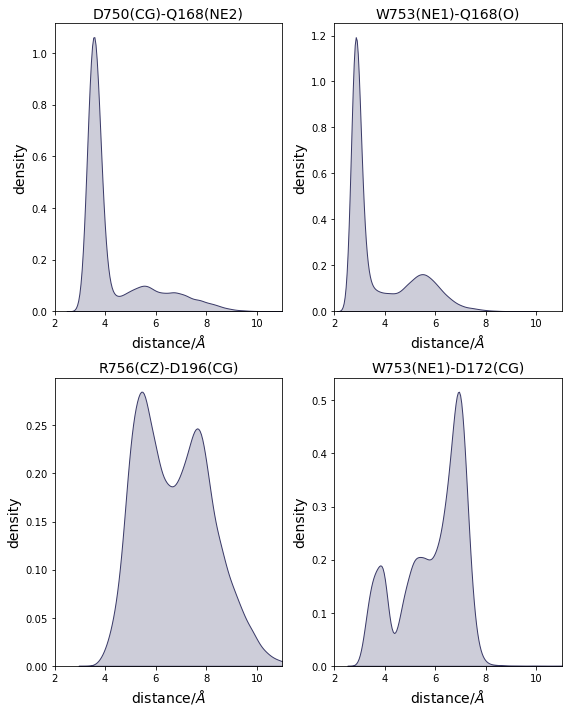

In [125]:
labels = ['D750(CG)-Q168(NE2)', 'W753(NE1)-Q168(O)', 'R756(CZ)-D196(CG)', 'W753(O)-H200(NE2)', 'W753(NE1)-D172(CG)']

fig, ax = plt.subplots(2, 2, figsize=(8,10))
ax = np.hstack(ax)

col = (51/225, 51/225, 92/225)

for j, i in enumerate([0, 1, 2, 4]):
    sns.kdeplot(il_distances.iloc[:,i], ax=ax[j], fill=True, color=col)
    ax[j].set_title(labels[i], size=14)
    ax[j].set_xlabel('distance/$\AA$', size=14)
    ax[j].set_ylabel('density', size=14)
    ax[j].set_xlim(2, 11)
    
fig.tight_layout()
fig.savefig('eq_il.png', dpi=300)

In [127]:
colors = [[0.16, 0.2, 0.36], [0.537, 0.741, 0.6196], [0.95, 0.69, 0.16], [0.78, 0.89, 1.0], [0.45, 0.07, 0.13], [0.88, 0.47, 0.08], [0.22, 0.55, 0.68]]
hatches = ['..', 'xx', 'o', '-', '|', '+', '/']
locations = ['../systems/apo/active/seeded-md_2step', '../systems/cAMP/active/seeded-md_2step',
             '../systems/L273W/active/seeded-md_2step', '../systems/I942/active/seeded-md_2step',
             '../systems/I942/active/seeded-md_restr_both', '../systems/I942/active/seeded-md_restr_lid',
             '../systems/I942/active/seeded-md_restr_pbc']
titles = ['apo', 'cAMP', 'L273W', 'I942', 'I942 full', 'I942 lid', 'I942 PBC']

In [126]:
il_distances = [np.loadtxt(f'{loc}/il.txt')[:,1:] for loc in locations]

In [129]:
distances = np.hstack(il_distances[i][:,0] for i in range(7))
systems = np.hstack([[title for i in range(10000)] for title in titles])
data = pd.DataFrame({'data': distances, 'systems': systems})

/tmp/ipykernel_2763898/68441463.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  distances = np.hstack(il_distances[i][:,0] for i in range(7))


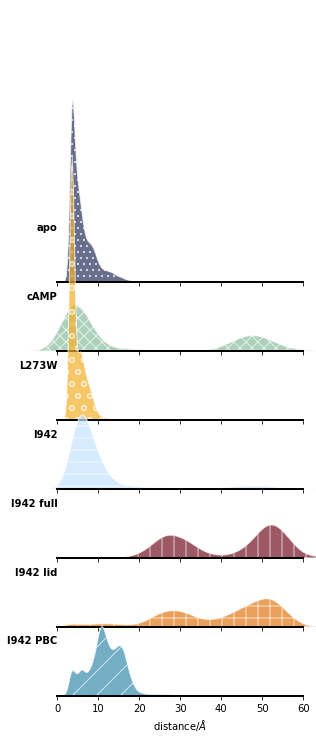

In [137]:
grid = sns.FacetGrid(data, row='systems', aspect=3, height=1.5)
grid.map_dataframe(sns.kdeplot, 'data', clip_on=False, fill=True, multiple='stack')
grid.map(plt.axhline, y=0, lw=2, clip_on=False, color='black')

for i in range(7):
    grid.axes[i][0].get_children()[0].set_facecolor(colors[i])
    grid.axes[i][0].get_children()[0].set_alpha(0.7)
    grid.axes[i][0].get_children()[0].set_hatch(hatches[i])
    grid.axes[i][0].get_children()[0].set_edgecolor('white')
    grid.axes[i][0].patch.set_alpha(0)
    grid.axes[i][0].set_xlim(0, 60)

def labelf(x, color):
    ax = plt.gca()
    ax.text(0, .2, x.iloc[0], fontweight="bold", color='black',
            ha="right", va="center", transform=ax.transAxes)

grid.map(labelf, 'systems')

grid.fig.subplots_adjust(hspace=-0.75)

grid.set_titles('')
grid.set(yticks=[], xlabel='distance/$\AA$', ylabel='')
grid.despine(bottom=True, left=True)

grid.fig.savefig('IL.png')

## 2. Example sMD results

[top](#Supplementary-Information)

#### inactive to active

In [2]:
data1 = pd.read_csv('../systems/apo/inactive/seeded-md_2step/steering/steering_1.dat', delim_whitespace=True).iloc[:,1:12000]
data2 = pd.read_csv('../systems/apo/inactive/seeded-md_2step/steering/steering_2.dat', delim_whitespace=True).iloc[:,1:]
data = pd.concat([data1, data2], ignore_index=True)
columns = data.columns[2:]
data = data.iloc[:,:-2]
data.columns = columns
data.index = data.index*0.005

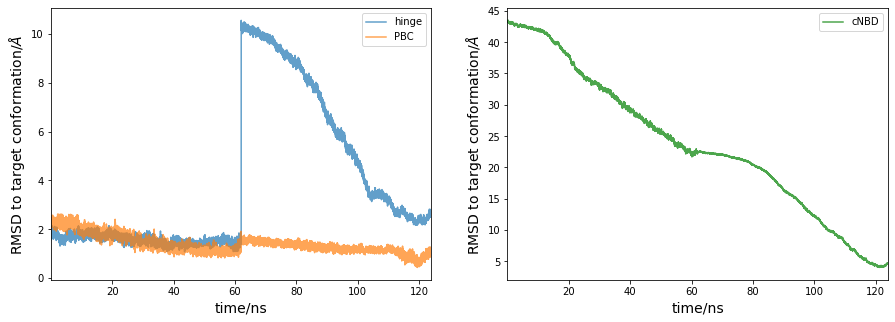

In [3]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(data.index, data['hinge']*10, alpha=0.7, label='hinge')
ax[0].plot(data.index, data['pbc']*10, alpha=0.7, label='PBC')
ax[1].plot(data.index, data['cnbd']*10, alpha=0.7, label='cNBD', color='green')

for i in range(2):
    ax[i].legend()
    ax[i].set_xlim(data.index[1], data.index[-1])
    ax[i].set_xlabel('time/ns', size=14)
    ax[i].set_ylabel(f'RMSD to target conformation/$\AA$', size=14)

#### active to inactive

In [4]:
data1 = pd.read_csv('../systems/apo/active/seeded-md_2step/steering/steering_1.dat', delim_whitespace=True).iloc[:,1:12000]
data2 = pd.read_csv('../systems/apo/active/seeded-md_2step/steering/steering_2.dat', delim_whitespace=True).iloc[:,1:]
data = pd.concat([data1, data2], ignore_index=True)
columns = data.columns[2:]
data = data.iloc[:,:-2]
data.columns = columns
data.index = data.index*0.005

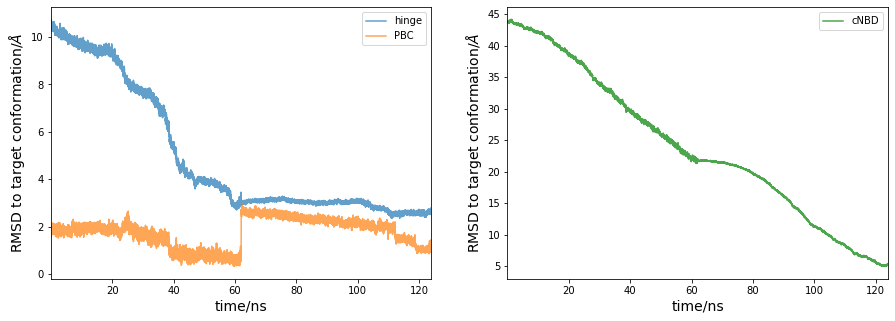

In [5]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(data.index, data['hinge']*10, alpha=0.7, label='hinge')
ax[0].plot(data.index, data['pbc']*10, alpha=0.7, label='PBC')
ax[1].plot(data.index, data['cnbd']*10, alpha=0.7, label='cNBD', color='green')

for i in range(2):
    ax[i].legend()
    ax[i].set_xlim(data.index[1], data.index[-1])
    ax[i].set_xlabel('time/ns', size=14)
    ax[i].set_ylabel(f'RMSD to target conformation/$\AA$', size=14)

## 3. sMD CV target values

[top](#Supplementary-Information)

#### From 1 $\mu$s equilibrium MD:

In [6]:
files = ['domain_angle.txt', 'hinge.txt', 'pbc.txt']
states= ['active', 'inactive']
features = ['Domain angle/$^{o}$', 'hinge RMSD/$\AA$', 'PBC RMSD/$\AA$']

eq_data = []

for state in states:
    state_data = []
    for file in files:
        data = np.loadtxt(f'../systems/apo/{state}/equilibrium/{file}')
        state_data.append(data[:,1])
    eq_data.append(state_data)

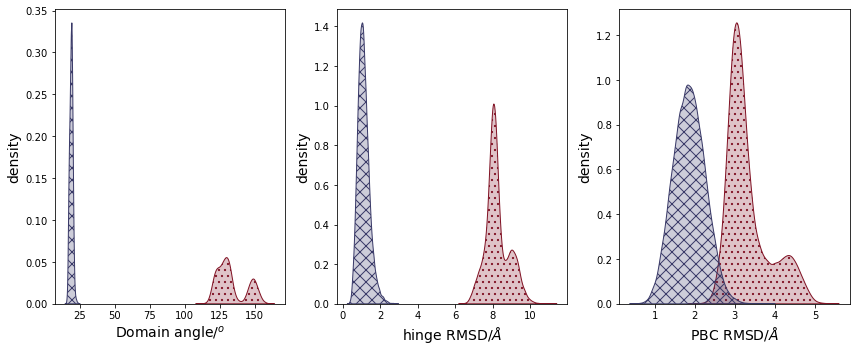

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(12,5))

state_line = [80, 5, 2.8]
colors = [(114/225, 17/225, 33/225), (51/225, 51/225, 92/225)]
hatches = ['..', 'xx']

for i, state in enumerate(states):
    for j, file in enumerate(files):
        sns.kdeplot(eq_data[i][j], shade=True, ax=ax[j], label=state, hatch=hatches[i], color=colors[i])
        ax[j].set_xlabel(features[j], size=14)
        ax[j].set_ylabel('density', size=14)
fig.tight_layout()
fig.savefig('eq_md_features.png', dpi=300)

#### From sMD RAP-RR clashes:

In [62]:
domain_angle = np.loadtxt('../systems/apo/inactive/seeded-md_2step/steering/domain_angle.txt')
rap_clashes = np.loadtxt('../systems/apo/inactive/seeded-md_2step/steering/RAP_min_CA_distances.txt')

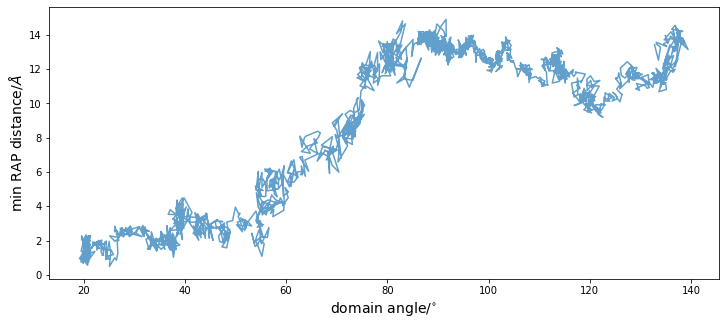

In [63]:
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(domain_angle, rap_clashes, alpha=0.7)
ax.set_xlabel('domain angle/$^{\circ}$', size=14)
ax.set_ylabel('min RAP distance/$\AA$', size=14)

fig.savefig('domain_angle_RAP.png', dpi=300)

## 4. K305 Hbond

[top](#Supplementary-Information)

In [38]:
colors = [[0.16, 0.2, 0.36], [0.537, 0.741, 0.6196], [0.95, 0.69, 0.16], [0.78, 0.89, 1.0], [0.45, 0.07, 0.13], [0.88, 0.47, 0.08], [0.22, 0.55, 0.68]]
hatches = ['..', 'xx', 'o', '-', '|', '+', '/']
locations = ['../systems/apo/active/seeded-md_2step', '../systems/cAMP/active/seeded-md_2step',
             '../systems/L273W/active/seeded-md_2step', '../systems/I942/active/seeded-md_2step',
             '../systems/I942/active/seeded-md_restr_both', '../systems/I942/active/seeded-md_restr_lid',
             '../systems/I942/active/seeded-md_restr_pbc']

In [13]:
distances = [np.loadtxt(f'{loc}/K305.txt')[:,1] for loc in locations]

In [14]:
titles = ['apo', 'cAMP', 'L273W', 'I942', 'I942 full', 'I942 lid', 'I942 PBC']

In [20]:
data = np.hstack(distances)
labels = np.hstack([[title for i in range(10000)] for title in titles])
df = pd.DataFrame({'data': data, 'labels': labels})

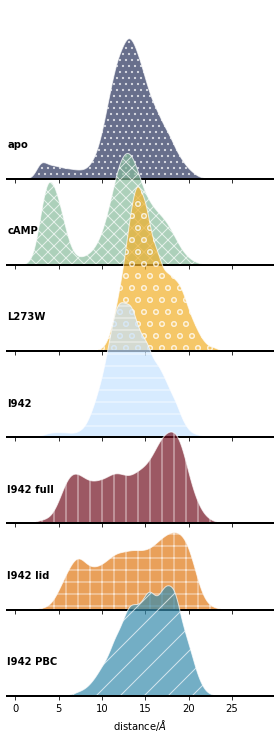

In [39]:
grid = sns.FacetGrid(df, row='labels', aspect=3, height=1.5)
grid.map_dataframe(sns.kdeplot, 'data', clip_on=False, fill=True, multiple='stack')
grid.map(plt.axhline, y=0, lw=2, clip_on=False, color='black')

for i in range(7):
    grid.axes[i][0].get_children()[0].set_facecolor(colors[i])
    grid.axes[i][0].get_children()[0].set_alpha(0.7)
    grid.axes[i][0].get_children()[0].set_hatch(hatches[i])
    grid.axes[i][0].get_children()[0].set_edgecolor('white')
    grid.axes[i][0].patch.set_alpha(0)

def labelf(x, color):
    ax = plt.gca()
    ax.text(0, .2, x.iloc[0], fontweight="bold", color='black',
            ha="left", va="center", transform=ax.transAxes)

grid.map(labelf, 'labels')

grid.fig.subplots_adjust(hspace=-0.5)

grid.set_titles('')
grid.set(yticks=[], xlabel='distance/$\AA$', ylabel='')
grid.despine(bottom=True, left=True)

grid.fig.savefig('K305.png')

## 5. cAMP Hbonds with L273W

[top](#Supplementary-Information)

#### Full ensemble

In [44]:
l273w_hbonds = pd.read_csv('../systems/L273W/active/seeded-md_2step/hbonds.txt', delim_whitespace=True).iloc[:,1:]
l273w_hbonds = pd.concat([l273w_hbonds, pd.read_csv('../systems/L273W/active/seeded-md_2step/hbonds_active.txt', delim_whitespace=True).iloc[:,1:]], axis=1)

In [46]:
bonds = [['G269', 'R279', 'A280', 'A281'], ['K353', 'E315']]

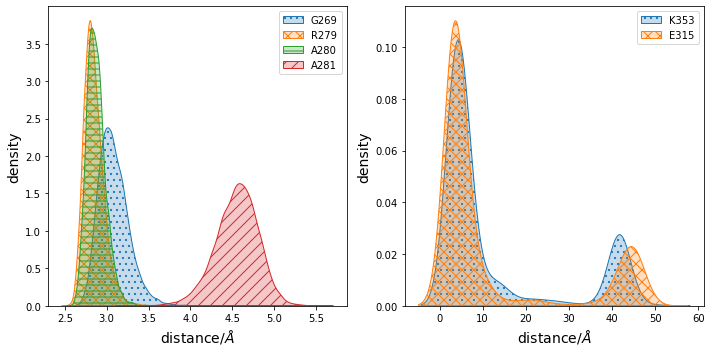

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

hatches = ['..', 'xx', '--', '//']

for i in range(2):
    for j in range(len(bonds[i])):
        sns.kdeplot(l273w_hbonds[bonds[i][j]], ax=ax[i], shade=True, hatch=hatches[j], label=bonds[i][j])
    ax[i].set_xlabel('distance/$\AA$', size=14)
    ax[i].set_ylabel('density', size=14)
    ax[i].legend()

fig.tight_layout()
fig.savefig('L273W_hbonds.png', dpi=300)

## 6. I942 internal dihedrals

[top](#Supplementary-Information)

In [2]:
locations = ['../systems/I942/active/seeded-md_2step', '../systems/I942/active/seeded-md_restr_both',
             '../systems/I942/active/seeded-md_restr_lid', '../systems/I942/active/seeded-md_restr_pbc']

In [4]:
for loc in locations:
    with open(f'{loc}/internal_dih.in', 'w') as file:
        file.writelines([f'parm {loc}/../system-setup/system_dry.prm7\n',
                         f'trajin {loc}/stationary.nc\n',
                         f"dihedral dihedral :I94@S :I94@N :I94@C3' :I94@C2' out {loc}/internal_dih.txt\n",
                         f"dihedral :I94@N :I94@C3' :I94@C2' :I94@O1 out {loc}/internal_dih.txt\n",
                          'go\nquit\n'])
    subprocess.run(['cpptraj', '-i', f'{loc}/internal_dih.in'], stdout=subprocess.DEVNULL)

In [7]:
i942_dih = [np.loadtxt(f'{loc}/internal_dih.txt')[:,1:] for loc in locations]

In [8]:
colors = [[0.78, 0.89, 1.0], [0.45, 0.07, 0.13], [0.88, 0.47, 0.08], [0.79, 0.96, 0.80]]
hatches = ['-', '|', '+', '/']

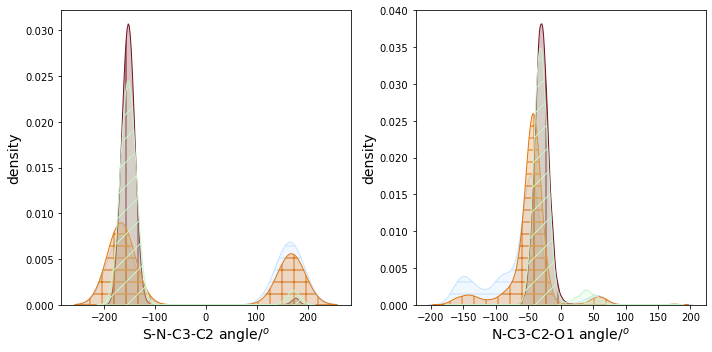

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

labels = ['S-N-C3-C2', 'N-C3-C2-O1']

for i in range(2):
    for j in range(4):
        sns.kdeplot(i942_dih[j][:,i], ax=ax[i], fill=True, hatch=hatches[j], color=colors[j])
    ax[i].set_xlabel('%s angle/$^{o}$'%labels[i], size=14)
    ax[i].set_ylabel('density', size=14)

fig.tight_layout()
#fig.savefig('I942_internal.png', dpi=300, bbox_inches='tight')

## 7. Restraints

[top](#Supplementary-Information)

In [88]:
def restr_e(r2, r3, r4, rk2, rk3, distances):
    values = []
    for d in distances:
        if d < r2:
            values.append(rk2*(d-r2)**2)
        elif r2 <= d < r3:
            values.append(0)
        elif r3 <= d < r4:
            values.append(rk3*(d-r3)**2)
        else:
            a = 3*(r4-r3)**2
            b = -2*(r4-r3)**3
            values.append(rk3*(b/(d-r3)+a))
    return values

I942(O1) to G269(N):

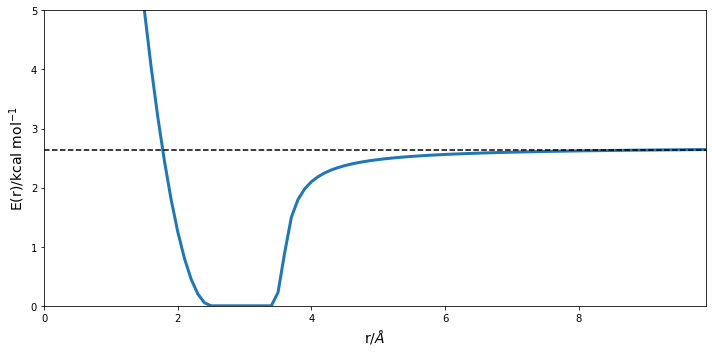

In [115]:
x = np.arange(0, 10, 0.1)

values = restr_e(2.5, 3.4, 3.6, 5.0, 22.5, x)

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(x, values, linewidth=3)
ax.hlines(values[-1], x.min(), x.max(), linestyles='--', color='black')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(0, 5)
ax.set_xlabel('r/$\AA$', size=14)
ax.set_ylabel('E(r)/kcal mol$^{-1}$', size=14)
fig.tight_layout()
fig.savefig('i942_pbc_restr.png', dpi=300)

I942(C16) to K353(NZ):

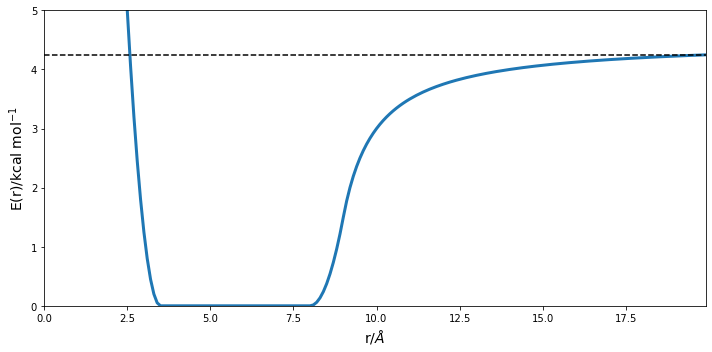

In [116]:
x = np.arange(0, 20, 0.1)

values = restr_e(3.5, 8.0, 9.0, 5.0, 1.5, x)

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(x, values, linewidth=3)
ax.hlines(values[-1], x.min(), x.max(), linestyles='--', color='black')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(0, 5)
ax.set_xlabel('r/$\AA$', size=14)
ax.set_ylabel('E(r)/kcal mol$^{-1}$', size=14)
fig.tight_layout()
fig.savefig('i942_lid_restr_1.png', dpi=300)

I942(C3) to K353(NZ):

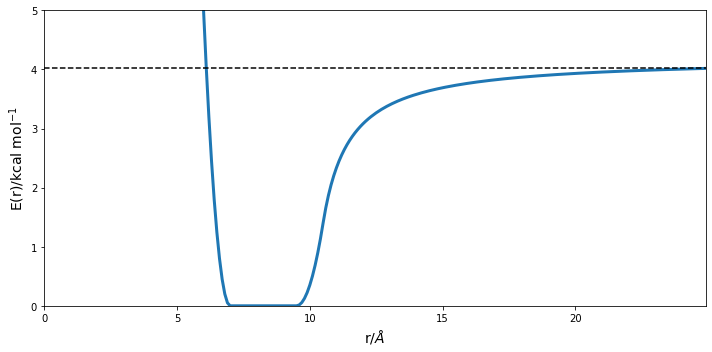

In [117]:
x = np.arange(0, 25, 0.1)

values = restr_e(7.0, 9.5, 10.5, 5.0, 1.4, x)

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(x, values, linewidth=3)
ax.hlines(values[-1], x.min(), x.max(), linestyles='--', color='black')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(0, 5)
ax.set_xlabel('r/$\AA$', size=14)
ax.set_ylabel('E(r)/kcal mol$^{-1}$', size=14)
fig.tight_layout()
fig.savefig('i942_lid_restr_2.png', dpi=300)